**Nombres:** Valentina Hernández Quintana y Laura Alejandra Rincón Castaño.

# **Proyecto final: Identificación automatizada de rampas urbanas para movilidad inclusiva.**

### **Preparación y anotación del dataset:**

Para la creación y gestión de nuestro conjunto de datos propio, hemos utilizado la plataforma Roboflow, que facilita de manera eficiente la anotación precisa para tareas de detección y segmentación de objetos. Roboflow nos permitió realizar anotaciones detalladas de las rampas urbanas en imágenes reales, definiendo bounding boxes y máscaras de segmentación para cada instancia.

Además, la plataforma ofrece herramientas integradas para dividir el dataset en subconjuntos de entrenamiento, validación y prueba, asegurando una correcta evaluación del modelo. También aprovechamos sus funcionalidades de aumento de datos (data augmentation), lo que contribuye a mejorar la robustez y generalización del modelo ante variaciones reales en el entorno urbano.

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow

In [ ]:
# Importar Roboflow y acceder al workspace y proyecto
rf = Roboflow(api_key="Ouks0aNv3B8r7IcgQDRI")
project = rf.workspace("vision-computacional-u02en").project("ramps-detection-n1ecd")
version = project.version(1)

# Descargar el dataset en formato YOLOv5
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ramps-detection-1 in yolov11:: 100%|██████████| 396/396 [00:00<00:00, 7612.93it/s]


##**Entrenamiento del dataset (Detección):**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 98.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Cargar modelo base preentrenado YOLO11
model = YOLO('yolo11n.pt')

# Entrenar el modelo con el dataset propio
model.train(
    data='/content/Ramps-detection-1/data.yaml',
    epochs=150,
    imgsz=640,
    batch=16,
    name='rampa_model',
    augment=True,
    patience=20  # Detiene si no hay mejora en 10 epochs
)

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Ramps-detection-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rampa_model4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12

train: Scanning /content/Ramps-detection-1/train/labels.cache... 168 images, 0 backgrounds, 0 corrupt: 100%|██████████| 168/168 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 383.7±42.3 MB/s, size: 56.4 KB)


val: Scanning /content/Ramps-detection-1/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/detect/rampa_model4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/rampa_model4
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      3.82G      2.079      3.922      2.162         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         16         19    0.00271      0.684     0.0378     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      3.82G      1.815      3.609      1.865         24        640: 100%|██████████| 11/11 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         16         19    0.00333      0.842     0.0198    0.00677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      3.82G      1.784      3.319      1.752         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         16         19    0.00333      0.842     0.0779     0.0287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      3.82G      1.815      3.085      1.786         17        640: 100%|██████████| 11/11 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.49it/s]

                   all         16         19    0.00229      0.579     0.0544     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      3.82G      1.882      3.127      1.862         10        640: 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.00it/s]

                   all         16         19    0.00271      0.684     0.0211    0.00531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      3.82G      1.849      2.897      1.803         19        640: 100%|██████████| 11/11 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.23it/s]

                   all         16         19     0.0651      0.316     0.0772      0.022



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      3.82G      1.791      2.711      1.788         24        640: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         16         19     0.0706     0.0526     0.0301     0.0129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      3.82G      1.857       2.72      1.818         24        640: 100%|██████████| 11/11 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         16         19      0.382      0.105     0.0925     0.0553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      3.82G      1.788      2.691      1.821         10        640: 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all         16         19      0.109      0.158     0.0292    0.00939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      3.82G      1.789      2.422      1.749         18        640: 100%|██████████| 11/11 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         16         19     0.0776     0.0526     0.0242    0.00687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      3.82G      1.767      2.375      1.772         19        640: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         16         19      0.112      0.211     0.0499     0.0132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      3.82G      1.806      2.392      1.791         17        640: 100%|██████████| 11/11 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         16         19      0.319      0.263      0.207     0.0584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      3.82G       1.75      2.315      1.787         12        640: 100%|██████████| 11/11 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.74it/s]

                   all         16         19      0.226      0.474      0.259      0.081



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      3.82G      1.741      2.143      1.781         17        640: 100%|██████████| 11/11 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.70it/s]

                   all         16         19     0.0916      0.421     0.0781     0.0283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      3.82G       1.69      2.188      1.732         14        640: 100%|██████████| 11/11 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all         16         19      0.107      0.474      0.105     0.0409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      3.82G      1.686      2.027      1.667         15        640: 100%|██████████| 11/11 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.77it/s]


                   all         16         19      0.425      0.579      0.358     0.0775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      3.82G      1.671      1.917       1.66         17        640: 100%|██████████| 11/11 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.05it/s]


                   all         16         19      0.445      0.263       0.25     0.0984

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      3.82G      1.641      1.939      1.645         11        640: 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all         16         19      0.297      0.263      0.288     0.0927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      3.82G      1.653      1.872      1.671         15        640: 100%|██████████| 11/11 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]


                   all         16         19      0.456      0.263      0.362      0.113

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      3.82G      1.605      1.702      1.597         20        640: 100%|██████████| 11/11 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.82it/s]

                   all         16         19      0.201      0.526      0.309      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      3.82G      1.716      1.938      1.652         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.89it/s]

                   all         16         19      0.362      0.368      0.283     0.0948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      3.82G      1.615      1.876      1.585         11        640: 100%|██████████| 11/11 [00:02<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         16         19      0.204      0.368       0.19     0.0802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      3.82G      1.571      1.742      1.612         13        640: 100%|██████████| 11/11 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         16         19      0.465      0.526      0.416      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      3.82G       1.61      1.806      1.633         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all         16         19      0.345      0.211      0.243     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      3.82G      1.599      1.813       1.64         12        640: 100%|██████████| 11/11 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all         16         19      0.139      0.366     0.0992     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      3.82G      1.516       1.61      1.574         18        640: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         16         19      0.439      0.421      0.347      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      3.82G      1.513      1.592       1.59         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all         16         19      0.432      0.421      0.356      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      3.82G       1.45      1.478       1.51         14        640: 100%|██████████| 11/11 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]


                   all         16         19       0.24      0.421      0.312     0.0923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      3.82G      1.462       1.43      1.495         22        640: 100%|██████████| 11/11 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.44it/s]

                   all         16         19      0.273      0.474      0.308      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      3.82G       1.46      1.451      1.523          9        640: 100%|██████████| 11/11 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         16         19      0.429      0.421      0.345     0.0821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      3.82G      1.508      1.468      1.544         13        640: 100%|██████████| 11/11 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all         16         19      0.339      0.526      0.396      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      3.82G      1.459       1.42      1.504         20        640: 100%|██████████| 11/11 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.32it/s]


                   all         16         19      0.727      0.421      0.535      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      3.82G      1.475      1.418       1.52         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.61it/s]

                   all         16         19      0.895       0.45      0.525       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      3.82G      1.412      1.329      1.465         14        640: 100%|██████████| 11/11 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]

                   all         16         19      0.774      0.526      0.669       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      3.82G      1.368      1.271      1.402         14        640: 100%|██████████| 11/11 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]

                   all         16         19      0.469      0.632      0.524      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      3.82G      1.419      1.329      1.446         18        640: 100%|██████████| 11/11 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.88it/s]

                   all         16         19      0.446      0.466      0.405      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      3.82G      1.364      1.319      1.423         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.70it/s]

                   all         16         19      0.508      0.368      0.366      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      3.82G      1.425      1.308      1.475         13        640: 100%|██████████| 11/11 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all         16         19      0.465      0.474       0.43      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      3.82G      1.385      1.271      1.432         13        640: 100%|██████████| 11/11 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         16         19      0.639      0.368      0.422      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      3.82G      1.403      1.276      1.441         18        640: 100%|██████████| 11/11 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.61it/s]

                   all         16         19      0.547      0.368      0.455      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      3.82G      1.344      1.177      1.389         19        640: 100%|██████████| 11/11 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         16         19       0.73      0.421      0.497      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      3.82G      1.304      1.199      1.398         20        640: 100%|██████████| 11/11 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all         16         19      0.683      0.421      0.533      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      3.82G      1.278      1.149      1.362         13        640: 100%|██████████| 11/11 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all         16         19      0.663      0.263      0.294      0.106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      3.82G      1.231      1.088      1.328         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]

                   all         16         19      0.358      0.411      0.338      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      3.82G      1.201      1.071      1.331         19        640: 100%|██████████| 11/11 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         16         19      0.342      0.494      0.331      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      3.82G      1.326      1.219      1.396         22        640: 100%|██████████| 11/11 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

                   all         16         19      0.547      0.255       0.23     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      3.82G      1.273      1.111      1.371         12        640: 100%|██████████| 11/11 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.91it/s]

                   all         16         19      0.342      0.302      0.236      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      3.82G      1.287      1.157      1.396         16        640: 100%|██████████| 11/11 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.52it/s]

                   all         16         19      0.443      0.316      0.295      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      3.82G      1.301      1.101      1.385         29        640: 100%|██████████| 11/11 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         16         19       0.57      0.368      0.349      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      3.82G      1.211      1.029      1.328         15        640: 100%|██████████| 11/11 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         16         19      0.638      0.421      0.495      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      3.82G      1.274      1.088      1.363         22        640: 100%|██████████| 11/11 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.62it/s]


                   all         16         19      0.525      0.368      0.395      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      3.82G      1.213      1.069      1.339         15        640: 100%|██████████| 11/11 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.45it/s]

                   all         16         19      0.663      0.421      0.482       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      3.82G      1.225      1.079      1.326         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         16         19      0.796      0.474        0.5      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      3.82G      1.226      1.039      1.302         17        640: 100%|██████████| 11/11 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.98it/s]

                   all         16         19      0.615      0.474       0.54      0.216
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 34, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



54 epochs completed in 0.051 hours.
Optimizer stripped from runs/detect/rampa_model4/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/rampa_model4/weights/best.pt, 5.5MB

Validating runs/detect/rampa_model4/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]


                   all         16         19       0.73      0.632      0.683      0.344
Speed: 0.2ms preprocess, 6.7ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/rampa_model4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78dfbf556450>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Métricas de evaluación
metrics = model.val()
results = metrics.results_dict

print(f"Precisión: {results['metrics/precision(B)']:.3f}")
print(f"Recall: {results['metrics/recall(B)']:.3f}")
print(f"mAP@0.5: {results['metrics/mAP50(B)']:.3f}")
print(f"mAP@0.5:0.95: {results['metrics/mAP50-95(B)']:.3f}")
print(f"Fitness: {results['fitness']:.3f}")

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1600.1±478.4 MB/s, size: 60.3 KB)


val: Scanning /content/Ramps-detection-1/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]


                   all         16         19       0.73      0.632      0.682      0.342
Speed: 0.2ms preprocess, 12.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/rampa_model42
Precisión: 0.730
Recall: 0.632
mAP@0.5: 0.682
mAP@0.5:0.95: 0.342
Fitness: 0.376


In [ ]:
import matplotlib.pyplot as plt

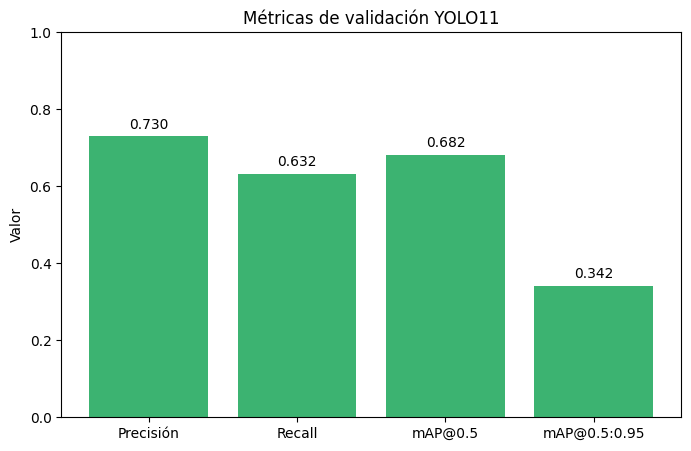

In [ ]:
# Visualización de métricas obtenidas durante el entrenamiento
labels = ['Precisión', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
values = [
    results['metrics/precision(B)'],
    results['metrics/recall(B)'],
    results['metrics/mAP50(B)'],
    results['metrics/mAP50-95(B)']
]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, values, color='mediumseagreen')
plt.ylim(0, 1)
plt.title('Métricas de validación YOLO11')
plt.ylabel('Valor')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.3f}', ha='center')

plt.show()

In [ ]:
# Realizar predicciones sobre imágenes de prueba y guardar resultados
results = model.predict('/content/Ramps-detection-1/test/images/*', imgsz=640, save=True)


image 1/8 /content/Ramps-detection-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_12_01-p_m__png.rf.2937f8ec8ea5c70a2f5520cf1b6da285.jpg: 640x640 3 Rampas, 30.6ms
image 2/8 /content/Ramps-detection-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_23_25-p_m__png.rf.515de0c382da2ba25d983f77bd891137.jpg: 640x640 2 Rampas, 27.1ms
image 3/8 /content/Ramps-detection-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_24_08-p_m__png.rf.779fc2ef5e7826868ed2a7facaa815b6.jpg: 640x640 5 Rampas, 27.6ms
image 4/8 /content/Ramps-detection-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_32_53-p_m__png.rf.adca7eee43655aa0870d103c5b922d1d.jpg: 640x640 3 Rampas, 40.8ms
image 5/8 /content/Ramps-detection-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_51_03-p_m__png.rf.adb35626e68c0c837ae7052ff41ef91b.jpg: 640x640 6 Rampas, 29.4ms
image 6/8 /content/Ramps-detection-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-5_36_20-p_m__png.rf.f7f7ce2a20dfd49cb4def5eabc3f5a3b.jpg: 640x

In [ ]:
import matplotlib.image as mpimg
import glob

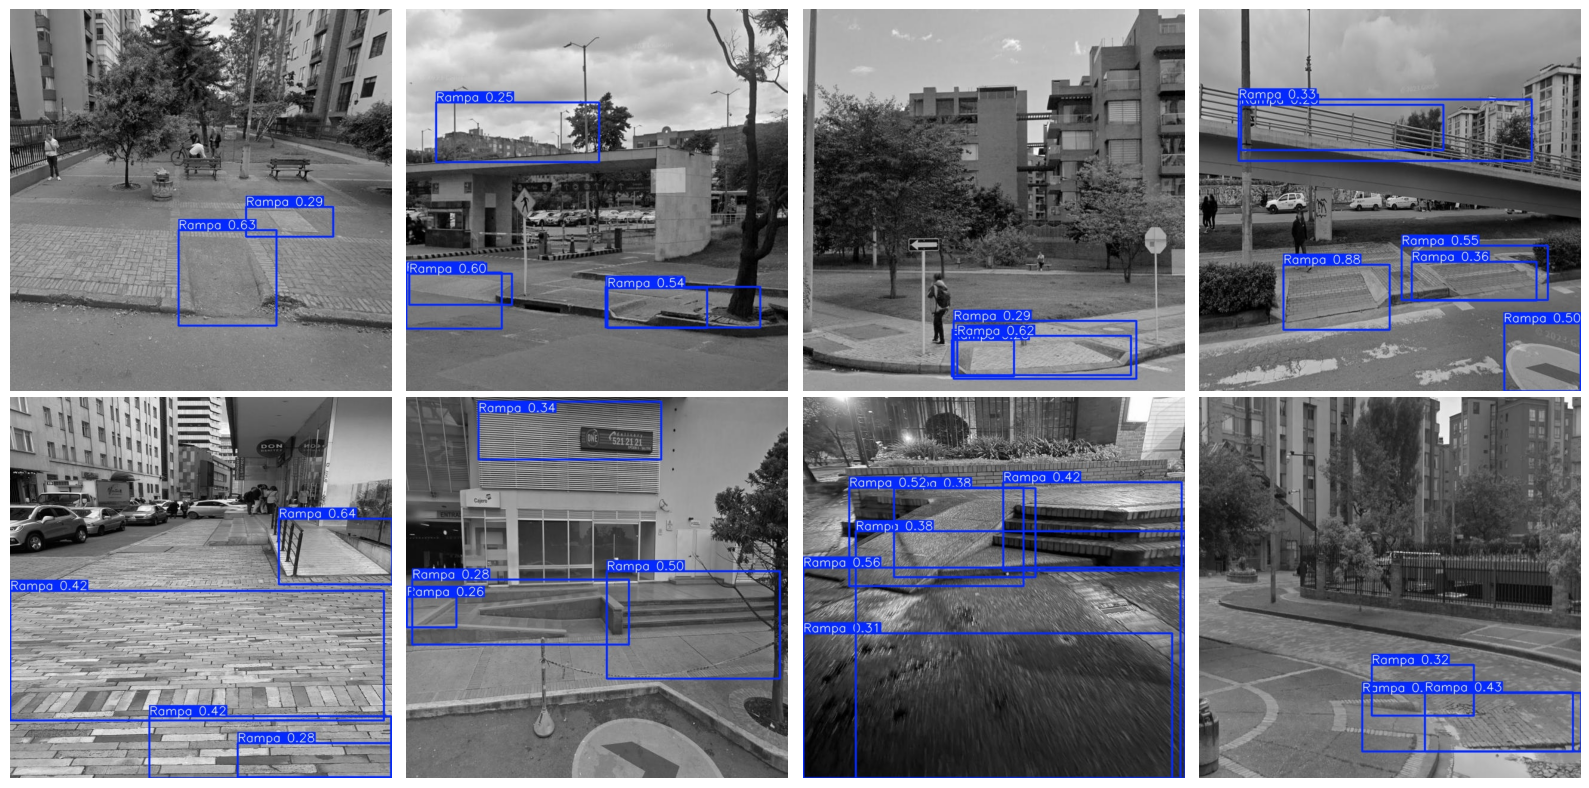

In [ ]:
# Mostrar visualmente algunas imágenes con las detecciones realizadas
output_images = glob.glob('runs/detect/rampa_model43/*.jpg')
max_images = 8

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    if i < len(output_images) and i < max_images:
        img = mpimg.imread(output_images[i])
        ax.imshow(img)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()


0: 640x640 1 Rampa, 5.0ms
1: 640x640 1 Rampa, 5.0ms
2: 640x640 (no detections), 5.0ms
3: 640x640 1 Rampa, 5.0ms
4: 640x640 1 Rampa, 5.0ms
5: 640x640 (no detections), 5.0ms
6: 640x640 3 Rampas, 5.0ms
7: 640x640 1 Rampa, 5.0ms
Speed: 2.0ms preprocess, 5.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


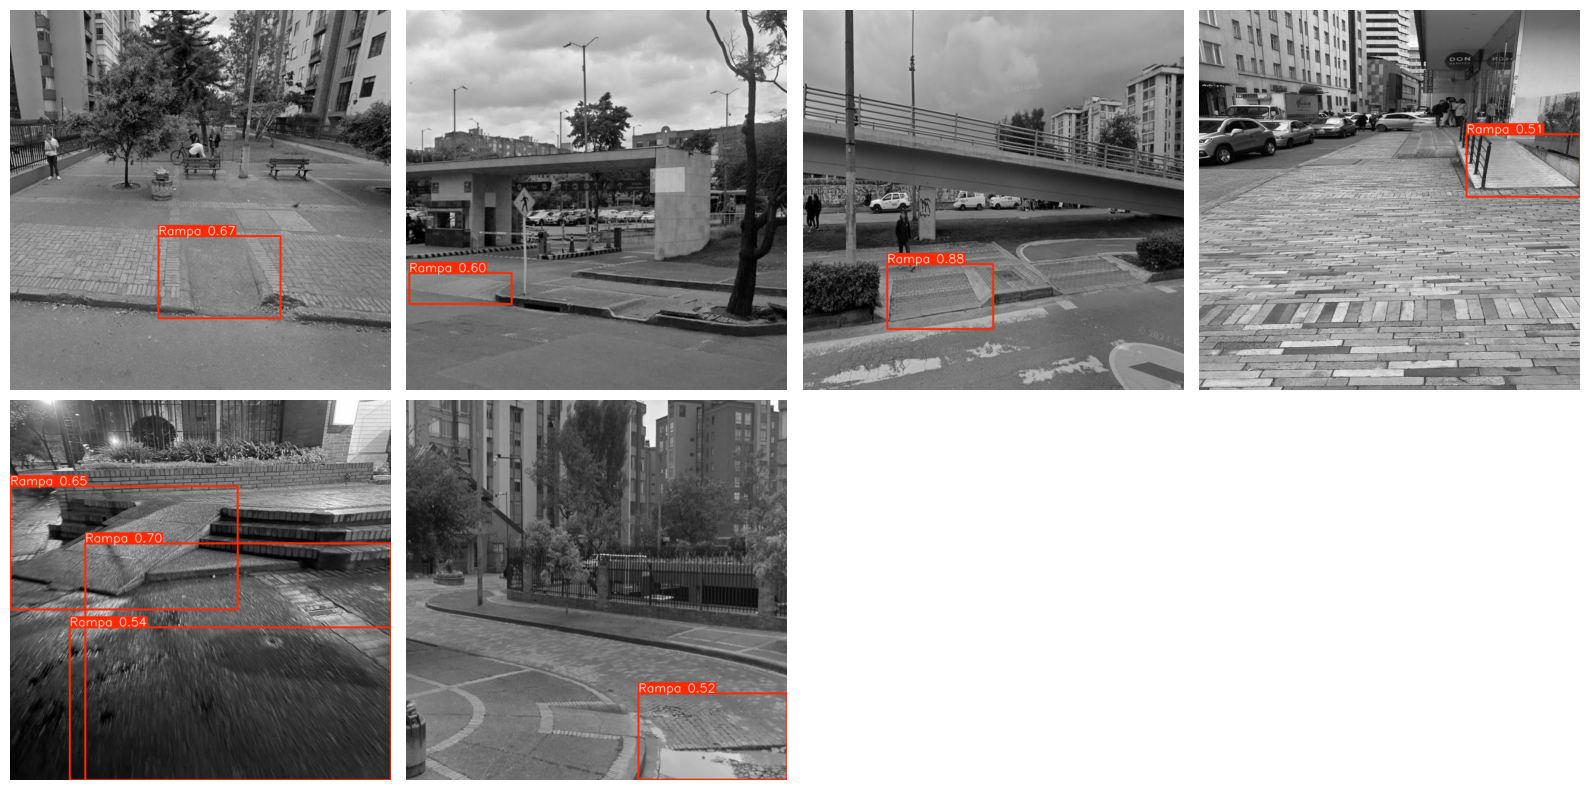

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import glob
import os

conf_threshold = 0.5
model = YOLO('/content/runs/detect/rampa_model/weights/best.pt')

test_images = glob.glob('/content/Ramps-detection-1/test/images/*.jpg')

# Realizar predicciones
results = model.predict(source=test_images, imgsz=640, conf=conf_threshold, save=False)

# Filtrar imágenes con al menos una detección válida
filtered_images = []
annotated_frames = []

for img_path, res in zip(test_images, results):
    # Obtener cajas con confianza > umbral
    boxes = res.boxes
    if boxes is not None and any(box.conf.item() > conf_threshold for box in boxes):
        # Cargar imagen y dibujar anotaciones
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        annotated = res.plot()  # Esto devuelve la imagen anotada con cajas
        filtered_images.append(img_path)
        annotated_frames.append(annotated)

# Mostrar solo un máximo de 8 imágenes
max_images = min(8, len(annotated_frames))
if max_images == 0:
    print(f"No se encontraron imágenes con detecciones por encima de {conf_threshold}.")
else:
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    for i, ax in enumerate(axes.flat):
        if i < max_images:
            ax.imshow(annotated_frames[i])
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()

## **Segmentación:**

In [ ]:
# Importar Roboflow y acceder al workspace y proyecto de segmentación
rf = Roboflow(api_key="Ouks0aNv3B8r7IcgQDRI")
project = rf.workspace("vision-computacional-u02en").project("ramps-segmentation")
version = project.version(1)

# Descargar dataset anotado para segmentación en formato compatible con YOLO11
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Ramps-segmentation-1 in yolov11:: 100%|██████████| 394/394 [00:00<00:00, 7154.54it/s]


In [ ]:
# Cargar modelo preentrenado para segmentación
segmentation_model = YOLO('yolo11n-seg.pt')

# Entrenar el modelo con nuestro dataset propio
segmentation_model.train(
    data='/content/Ramps-segmentation-1/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='rampa_segmentation_model'
)

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Ramps-segmentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rampa_segmentation_model5, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0

train: Scanning /content/Ramps-segmentation-1/train/labels.cache... 167 images, 0 backgrounds, 0 corrupt: 100%|██████████| 167/167 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 482.8±198.0 MB/s, size: 70.1 KB)


val: Scanning /content/Ramps-segmentation-1/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]


Plotting labels to runs/segment/rampa_segmentation_model5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/rampa_segmentation_model5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50       5.3G      1.696      4.485      3.792      1.796         10        640: 100%|██████████| 11/11 [00:04<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]

                   all         16         22    0.00313      0.682     0.0263    0.00937     0.0025      0.545     0.0175    0.00735



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       5.3G      1.343      2.728      3.163      1.376         22        640: 100%|██████████| 11/11 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.53it/s]

                   all         16         22    0.00333      0.727       0.13      0.047    0.00229        0.5      0.111     0.0429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50       5.3G      1.338      2.394      2.745      1.293         10        640: 100%|██████████| 11/11 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.32it/s]

                   all         16         22    0.00313      0.682      0.237      0.138     0.0025      0.545      0.155     0.0596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50       5.3G      1.325      2.105      2.432      1.308         10        640: 100%|██████████| 11/11 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         16         22    0.00271      0.591     0.0171     0.0112    0.00208      0.455     0.0172    0.00921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50       5.3G      1.309      2.325      2.257      1.294         11        640: 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]

                   all         16         22      0.654      0.273      0.251      0.132      0.652      0.227      0.218     0.0825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50       5.3G      1.304      2.223      2.159      1.322         13        640: 100%|██████████| 11/11 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         16         22      0.803      0.186      0.328      0.149      0.655      0.136      0.181      0.034



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.3G      1.375      2.218      2.081      1.336         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         16         22      0.588     0.0909       0.13     0.0781     0.0692     0.0909     0.0578     0.0351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50       5.3G      1.343      2.136      1.923      1.294         20        640: 100%|██████████| 11/11 [00:04<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all         16         22       0.31      0.136     0.0798     0.0399       0.31      0.136     0.0532     0.0136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50       5.3G      1.283      2.068       1.96      1.301         10        640: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         16         22      0.142      0.136     0.0455     0.0244      0.142      0.136     0.0385     0.0167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       5.3G      1.258      2.056      1.838      1.241         16        640: 100%|██████████| 11/11 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         16         22      0.265      0.364      0.213      0.105      0.206      0.273      0.091     0.0319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50       5.3G      1.313       1.89      1.792      1.286         17        640: 100%|██████████| 11/11 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all         16         22       0.22      0.364      0.151     0.0891      0.145      0.227     0.0897     0.0341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50       5.3G      1.215      1.973      1.667      1.239         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all         16         22       0.64      0.136      0.167     0.0343      0.367     0.0909     0.0578    0.00942



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50       5.3G      1.209      1.951      1.684      1.241         13        640: 100%|██████████| 11/11 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         16         22      0.226      0.273     0.0935      0.044      0.135      0.182     0.0412     0.0126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50       5.3G      1.231        1.8      1.535      1.234         20        640: 100%|██████████| 11/11 [00:04<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all         16         22      0.359      0.318      0.248      0.153      0.359      0.318      0.221      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50       5.3G      1.147      1.672      1.499      1.202         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all         16         22      0.478      0.318      0.249      0.144      0.478      0.318       0.24      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50       5.3G      1.085      1.666      1.341      1.129         14        640: 100%|██████████| 11/11 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         16         22      0.335      0.273      0.185     0.0992      0.387      0.227      0.166      0.074



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50       5.3G      1.148      1.754       1.47      1.204          8        640: 100%|██████████| 11/11 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         16         22     0.0809      0.227     0.0432     0.0202     0.0809      0.227     0.0333     0.0114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50       5.3G      1.089      1.701      1.375       1.13         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all         16         22      0.466      0.273      0.223      0.138      0.466      0.273      0.221      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50       5.3G      1.083      1.675      1.312      1.142         10        640: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         16         22       0.39      0.318      0.239      0.124       0.39      0.318      0.245      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50       5.3G      1.139      1.728      1.365      1.184         10        640: 100%|██████████| 11/11 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         16         22      0.391      0.318      0.275      0.161      0.448      0.364      0.294      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50       5.3G      1.096      1.511       1.23       1.14         14        640: 100%|██████████| 11/11 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]

                   all         16         22      0.291      0.224       0.15     0.0891      0.291      0.224      0.138     0.0807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50       5.3G      1.064      1.604      1.251      1.126         16        640: 100%|██████████| 11/11 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         16         22      0.618      0.318      0.285      0.124      0.523      0.273      0.216      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50       5.3G     0.9867       1.43      1.212      1.105         12        640: 100%|██████████| 11/11 [00:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         16         22      0.581      0.273      0.283      0.167      0.581      0.273      0.259      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50       5.3G      1.017      1.382      1.144      1.094         21        640: 100%|██████████| 11/11 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.06it/s]

                   all         16         22      0.607      0.227      0.264      0.153      0.607      0.227      0.247      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50       5.3G      1.004      1.518      1.099      1.081          9        640: 100%|██████████| 11/11 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         16         22      0.382      0.318      0.308      0.184      0.382      0.318      0.301      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50       5.3G     0.9352      1.328      1.003      1.046         13        640: 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         16         22      0.595      0.273      0.346      0.225      0.595      0.273       0.32      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50       5.3G     0.9853      1.358      1.068      1.095          9        640: 100%|██████████| 11/11 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all         16         22      0.626      0.227      0.266      0.189      0.626      0.227      0.242      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50       5.3G     0.9217      1.355     0.9488       1.03         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all         16         22      0.411      0.255      0.205      0.121      0.411      0.255      0.194     0.0969



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50       5.3G     0.9558      1.397      1.015      1.095         17        640: 100%|██████████| 11/11 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]

                   all         16         22       0.44      0.318      0.255       0.15       0.44      0.318      0.235      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50       5.3G      0.885      1.206     0.9466      1.054         16        640: 100%|██████████| 11/11 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         16         22      0.536      0.318      0.309      0.141      0.454      0.273      0.234      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50       5.3G     0.8643      1.227     0.9296      1.048         14        640: 100%|██████████| 11/11 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         16         22      0.555      0.364      0.338      0.194      0.484      0.318      0.291      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50       5.3G     0.9173      1.214     0.8964      1.069         16        640: 100%|██████████| 11/11 [00:04<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         16         22      0.525      0.227      0.194      0.136      0.525      0.227      0.183      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50       5.3G     0.8631      1.272     0.8941      1.043         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all         16         22      0.549      0.227      0.219      0.143      0.549      0.227      0.207      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50       5.3G     0.8101      1.164     0.8874      1.003         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]

                   all         16         22      0.554      0.226      0.226      0.144      0.554      0.226       0.21      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50       5.3G     0.8422      1.192     0.9105      1.025          9        640: 100%|██████████| 11/11 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         16         22      0.327      0.227      0.233      0.161      0.327      0.227      0.235      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50       5.3G     0.8384      1.141     0.8355      1.047         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         16         22      0.366      0.318      0.251      0.169      0.366      0.318      0.239       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50       5.3G     0.7954      1.143     0.8103      1.006         12        640: 100%|██████████| 11/11 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all         16         22      0.328      0.318      0.279      0.188      0.328      0.318      0.271       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50       5.3G     0.7922      1.111     0.8096      1.005         24        640: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         16         22      0.582      0.317      0.329      0.177      0.582      0.317      0.318      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50       5.3G     0.7718      1.068      0.771      1.004         17        640: 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         16         22       0.55      0.364      0.326      0.218       0.55      0.364      0.325      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50       5.3G     0.7729      1.074     0.7592     0.9957         15        640: 100%|██████████| 11/11 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         16         22      0.604      0.364      0.376      0.261      0.604      0.364      0.373      0.176


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50       5.3G     0.6935      1.043     0.7891     0.9912         11        640: 100%|██████████| 11/11 [00:06<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all         16         22      0.631      0.318      0.384      0.275      0.631      0.318      0.378      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50       5.3G     0.7276     0.9596     0.7695     0.9881          7        640: 100%|██████████| 11/11 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all         16         22      0.635      0.273      0.346      0.246      0.742      0.318      0.381      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50       5.3G     0.6695     0.8313     0.7179     0.9567          8        640: 100%|██████████| 11/11 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         16         22      0.543      0.364      0.413      0.301      0.543      0.364      0.404      0.243



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50       5.3G     0.6516     0.8856     0.6995     0.9762          9        640: 100%|██████████| 11/11 [00:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         16         22      0.445      0.364      0.388      0.289      0.421      0.364      0.387      0.225



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50       5.3G      0.642     0.9377     0.6725     0.9475          7        640: 100%|██████████| 11/11 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all         16         22      0.662      0.318      0.395      0.287      0.662      0.318      0.383      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50       5.3G      0.624     0.8473     0.6677     0.9339          8        640: 100%|██████████| 11/11 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all         16         22      0.832      0.273      0.372      0.285      0.832      0.273      0.357      0.215



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50       5.3G     0.6333      0.855     0.6708     0.9681          7        640: 100%|██████████| 11/11 [00:04<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         16         22      0.564      0.318      0.367      0.272      0.564      0.318      0.365      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       5.3G     0.5824     0.9328     0.6324     0.9488          7        640: 100%|██████████| 11/11 [00:02<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all         16         22      0.609      0.318      0.373      0.272      0.609      0.318      0.355        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50       5.3G     0.5976     0.8335      0.644     0.9459          7        640: 100%|██████████| 11/11 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.25it/s]

                   all         16         22      0.672      0.318      0.398      0.283      0.672      0.318      0.374       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50       5.3G     0.5808     0.7652     0.5977     0.9088          7        640: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         16         22      0.679      0.318      0.407       0.28      0.679      0.318      0.384      0.217



50 epochs completed in 0.060 hours.
Optimizer stripped from runs/segment/rampa_segmentation_model5/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/rampa_segmentation_model5/weights/best.pt, 6.0MB

Validating runs/segment/rampa_segmentation_model5/weights/best.pt...
Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


                   all         16         22      0.549      0.364      0.416      0.301      0.549      0.364      0.407      0.241
Speed: 0.5ms preprocess, 3.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/segment/rampa_segmentation_model5


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78dfe8a5a2d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [ ]:
# Métricas de evaluación
metrics = segmentation_model.val()
results = metrics.results_dict

print(f"Precisión: {results['metrics/precision(B)']:.3f}")
print(f"Recall: {results['metrics/recall(B)']:.3f}")
print(f"mAP@0.5: {results['metrics/mAP50(B)']:.3f}")
print(f"mAP@0.5:0.95: {results['metrics/mAP50-95(B)']:.3f}")
print(f"Fitness: {results['fitness']:.3f}")

Ultralytics 8.3.144 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,834,763 parameters, 0 gradients, 10.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1331.8±490.3 MB/s, size: 67.0 KB)


val: Scanning /content/Ramps-segmentation-1/valid/labels.cache... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]


                   all         16         22      0.546      0.364      0.413      0.302      0.546      0.364      0.404      0.243
Speed: 0.3ms preprocess, 7.0ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/segment/rampa_segmentation_model52
Precisión: 0.546
Recall: 0.364
mAP@0.5: 0.413
mAP@0.5:0.95: 0.302
Fitness: 0.573


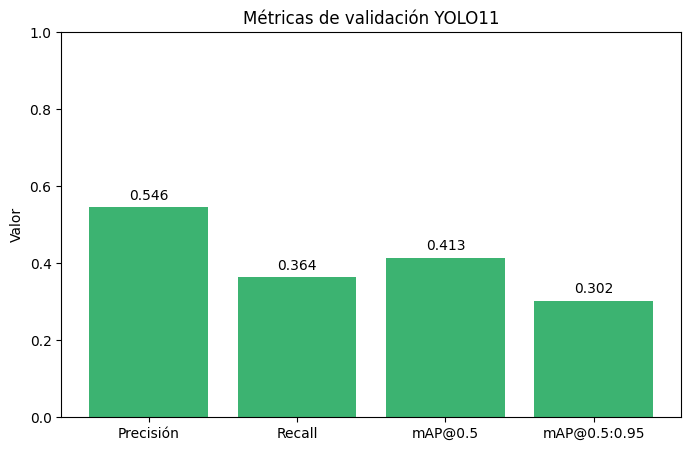

In [ ]:
# Visualización de métricas obtenidas durante el entrenamiento
labels = ['Precisión', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
values = [
    results['metrics/precision(B)'],
    results['metrics/recall(B)'],
    results['metrics/mAP50(B)'],
    results['metrics/mAP50-95(B)']
]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, values, color='mediumseagreen')
plt.ylim(0, 1)
plt.title('Métricas de validación YOLO11')
plt.ylabel('Valor')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.3f}', ha='center')

plt.show()

In [ ]:
# Realizar predicciones sobre imágenes de prueba y guardar resultados
results = segmentation_model.predict('/content/Ramps-segmentation-1/test/images/*', imgsz=640, save=True, conf=0.51)


image 1/8 /content/Ramps-segmentation-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_10_32-p_m__png.rf.2b59de4499a5cc62ff1034e8f298aead.jpg: 640x640 (no detections), 10.5ms
image 2/8 /content/Ramps-segmentation-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_12_01-p_m__png.rf.2ea42dd612ed8b9ba77a15dca78f3199.jpg: 640x640 1 Rampa, 10.5ms
image 3/8 /content/Ramps-segmentation-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_21_41-p_m__png.rf.adc6384342e6f70cd2824bd0a8e9e141.jpg: 640x640 1 Rampa, 10.6ms
image 4/8 /content/Ramps-segmentation-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_24_27-p_m__png.rf.31da8c0c3eae0f95e25c72e5a23ff063.jpg: 640x640 (no detections), 10.0ms
image 5/8 /content/Ramps-segmentation-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_28_12-p_m__png.rf.8f551bf6a30a5833b471881a7a748750.jpg: 640x640 1 Rampa, 10.0ms
image 6/8 /content/Ramps-segmentation-1/test/images/Captura-de-pantalla-2025-05-20-a-la-s-4_30_38-p_m__png.rf.adab14f36eab5

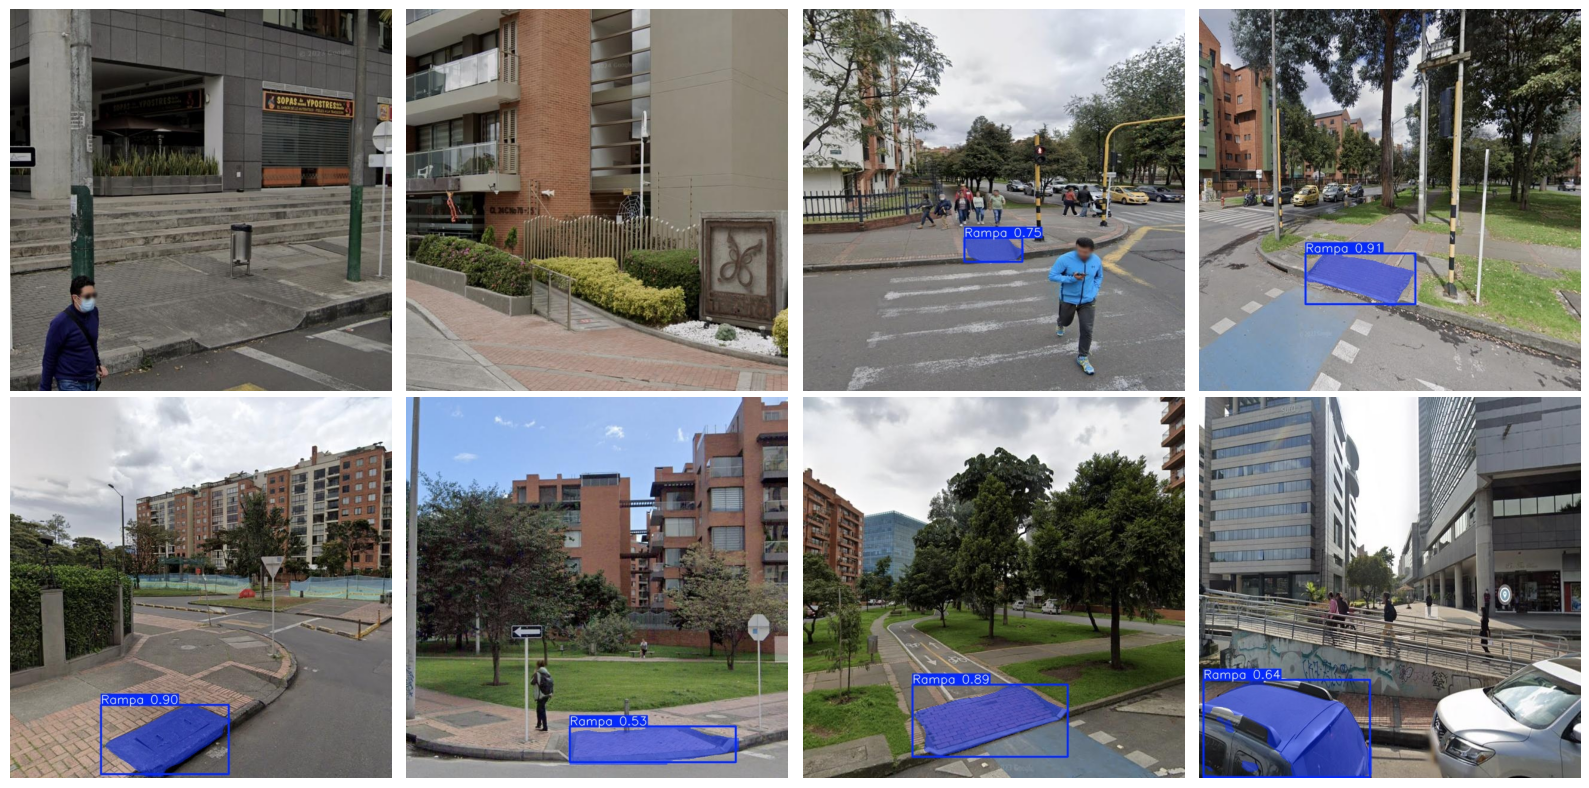

In [ ]:
# Mostrar visualmente algunas imágenes con las detecciones realizadas
output_images = glob.glob('runs/segment/rampa_segmentation_model53/*.jpg')
max_images = 8

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    if i < len(output_images) and i < max_images:
        img = mpimg.imread(output_images[i])
        ax.imshow(img)
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()